In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./fatal-police-shootings-data.csv')
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

데이터 유형들을 들여다 봤을 때, id는 int, age는 float, signs_of_mental_illness, body_camera는 bool인 것을 확인.

In [4]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

armed, age, gender, race, flee에 결측값이 있다는 것 또한 확인.

In [5]:
age = np.array(data['age'])
null_age_index = np.where(np.isnan(data['age']))
null_age_index = null_age_index[0]

mean_age = int(np.mean(data['age']))



for i in range(len(null_age_index)):
    data['age'][null_age_index[i]] = mean_age

C:\Users\SeoKyung\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


age는 평균 값으로 결측값을 채워줬다. np.where은 2차원으로 반환되기 때문에 null_age_index[0]으로 처리를 해준다.

In [6]:
data['gender'].value_counts()

M    5176
F     238
Name: gender, dtype: int64

value_counts()를 이용해 gender가 들어있는 유형과 갯수를 파악. M이 훨씬 많은걸 확인하고 결측값을 M으로 채우기로 결정

In [7]:
gender = np.array(data['gender'])
null_gender_index = np.where(data['gender'].isnull())
null_gender_index = null_gender_index[0]

for i in range(len(null_gender_index)):
    data['gender'][null_gender_index[i]] = 'M'

C:\Users\SeoKyung\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
data['race'].value_counts()

W    2476
B    1298
H     902
A      93
N      78
O      48
Name: race, dtype: int64

race의 종류는 6개. 결측값은 521개. 데이터의 수는 5416개. 데이터들 중, 약 절반은 W고 4분의 1은 B, 4분의 1은 H인걸 감안해서 데이터를 집어넣기로 결정.

In [9]:
race = np.array(data['race'])
null_race_index = np.where(data['race'].isnull())
null_race_index = null_race_index[0]

race_data_for_null = ['W','W','B','H']
race_data_for_null = np.array(race_data_for_null)

for i in range(len(null_race_index)):
    data['race'][null_race_index] = race_data_for_null[i % 4]

C:\Users\SeoKyung\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [10]:
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                          0
gender                       0
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [11]:
data['flee'].value_counts()

Not fleeing    3411
Car             900
Foot            692
Other           164
Name: flee, dtype: int64

도망 수단의 비율은 약5500개 데이터 중, 약 3400개가 도망치지 않음, 900개가 자동차, 700개가 도망감이다. 이를 비율로 나타내면 대략
6:2:2 = 3:1:1정도가 될 것이다.

In [12]:
flee = np.array(data['flee'])
null_flee_index = np.where(data['flee'].isnull())
null_flee_index = null_flee_index[0]

flee_data_for_null = ['Not fleeing','Not fleeing','Not fleeing','Car', 'Foot']
flee_data_for_null = np.array(flee_data_for_null)

for i in range(len(null_flee_index)):
    data['flee'][null_flee_index] = flee_data_for_null[i % 5]

C:\Users\SeoKyung\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
data['armed'].value_counts()

gun                    3060
knife                   792
unarmed                 353
toy weapon              186
undetermined            164
                       ... 
hand torch                1
cordless drill            1
motorcycle                1
car, knife and mace       1
wasp spray                1
Name: armed, Length: 93, dtype: int64

무장한 장비 데이터를 들여다 봤을 때, 5416개의 데이터 중 절반 이상이 gun이고, 800개 가량이 knife, unarmed가 400개 가량인 걸 확인.
30:8:4 = 15:4:2 = 약 8:2:1이므로 이를 순서대로 넣어준다.

In [14]:
armed = np.array(data['armed'])
null_armed_index = np.where(data['armed'].isnull())
null_armed_index = null_armed_index[0]

armed_data_for_null = []
# race_data_for_null[0:8:10:11] = ['gun', 'knife', 'unarmed'] 이런 문법은 안 되나?
for i in range(0,8):
    armed_data_for_null.append('gun')

# temp = ['knife', 'knife', 'unarmed']
# armed_data_for_null.append(temp) 
# 이렇게 하니까 ([], list()) 값이 이런 식으로 들어가서 제대로 안 들어갔다.

armed_data_for_null.append('knife')
armed_data_for_null.append('knife')
armed_data_for_null.append('unarmed')

armed_data_for_null = np.array(armed_data_for_null)

# TypeError: object of type 'numpy.int64' has no len() 때문에 고생중
for i in range(len(null_armed_index)):
    data['armed'][null_armed_index] = armed_data_for_null[i % 11]

C:\Users\SeoKyung\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [16]:
data['manner_of_death'].value_counts()

shot                5146
shot and Tasered     270
Name: manner_of_death, dtype: int64

In [17]:
shot = np.where(data['manner_of_death'] == 'shot')
shot_and_tasered = np.where(data['manner_of_death'] == 'shot and Tasered')

shot_kinds에 뭐가 들어있는지 확인하고 두 종류인 걸 봐서 각각 인덱스 데이터만 담는다.

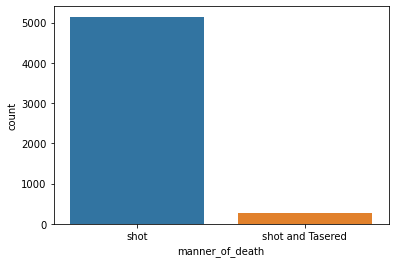

shot rate :  0.95
shot and Taserd :  0.05


In [18]:
import seaborn

seaborn.countplot(x="manner_of_death", data = data)
plt.show()
print("shot rate : ", np.round(len(shot[0]) / len(data['manner_of_death']), 3))
print("shot and Taserd : ", np.round(len(shot_and_tasered[0]) / len(data['manner_of_death']), 3))

countplot(x="column_name", data=dataframe)
plt.show()
을 이용해서 시각화 한다.
round(,3)
이렇게 하면 세번째 자리에서 반올림 해서 보여준다.

In [19]:
data['city'].value_counts()

Los Angeles             85
Phoenix                 78
Houston                 57
Las Vegas               45
San Antonio             43
                        ..
Angel Fire               1
Barrow                   1
East Flat Rock           1
Irvington                1
Gardnerville Ranchos     1
Name: city, Length: 2470, dtype: int64

In [20]:
data['state'].value_counts().head()

CA    799
TX    481
FL    350
AZ    254
CO    195
Name: state, dtype: int64

In [21]:
data['signs_of_mental_illness'].value_counts()

False    4200
True     1216
Name: signs_of_mental_illness, dtype: int64

In [22]:
data['threat_level'].value_counts()

attack          3495
other           1682
undetermined     239
Name: threat_level, dtype: int64

In [23]:
data['body_camera'].value_counts()

False    4798
True      618
Name: body_camera, dtype: int64

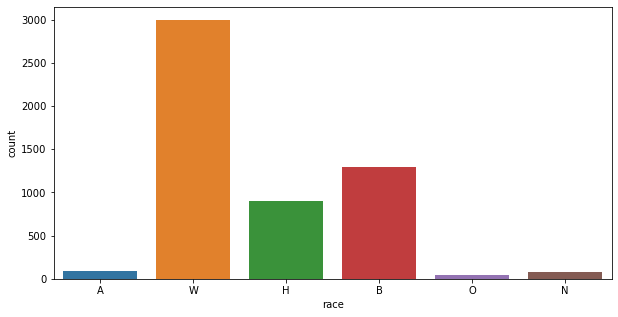

<function matplotlib.pyplot.show(*args, **kw)>

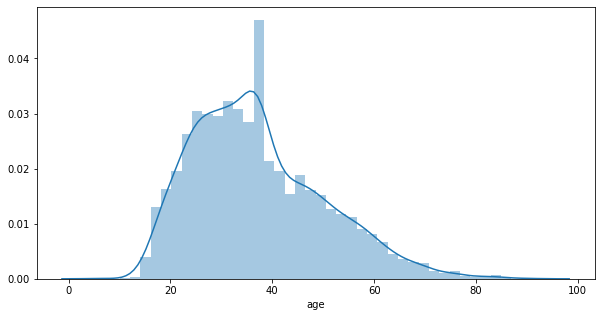

In [24]:
plt.figure(figsize=(10,5))
seaborn.countplot(x='race', data = data)
plt.show()

plt.figure(figsize=(10,5))
seaborn.distplot(data['age'])
plt.show

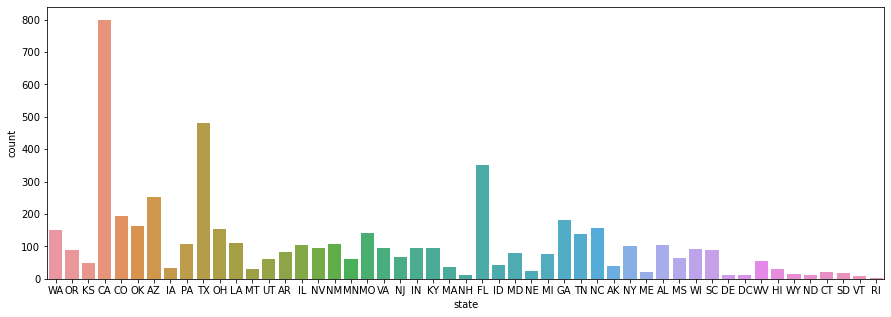

In [25]:
plt.figure(figsize=(15,5))
seaborn.countplot(x='state', data = data)
plt.show()

In [26]:
data_date = pd.to_datetime(data['date'], format='%Y-%m-%d', errors='raise')
data['year'] = data_date.dt.year
data['month'] = data_date.dt.month
data['day'] = data_date.dt.day

캘린더에서 날짜 값들을 비교해서 적당하게 넣어준다.

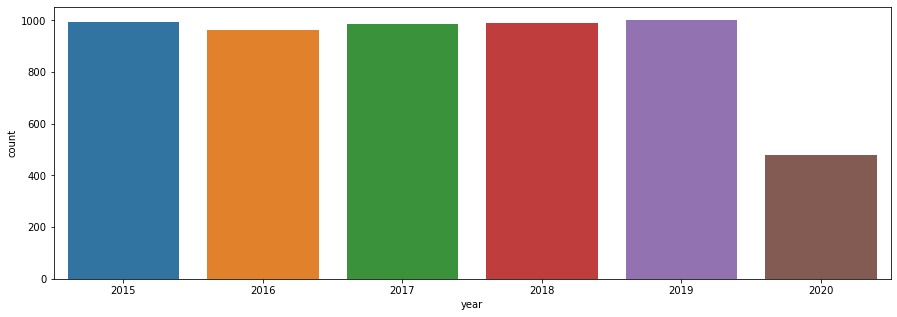

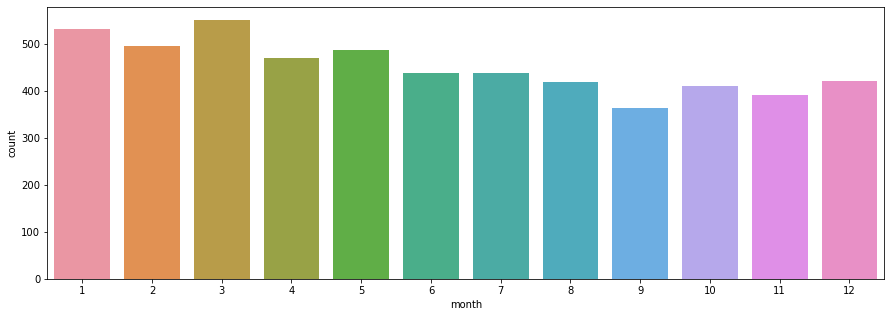

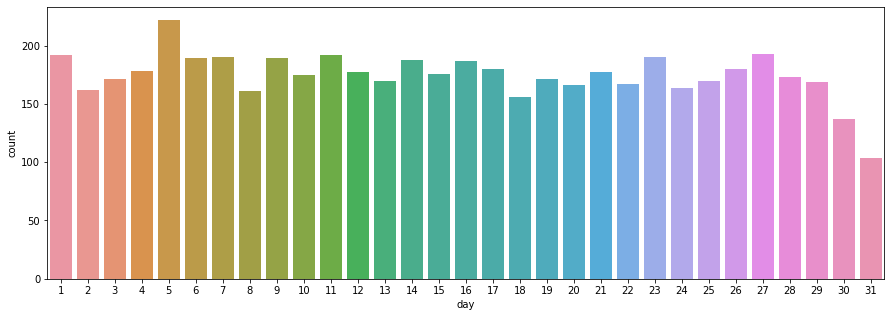

In [27]:
plt.figure(figsize=(15,5))
seaborn.countplot(x="year",data = data)
plt.show()

plt.figure(figsize=(15,5))
seaborn.countplot(x="month",data = data)
plt.show()

plt.figure(figsize=(15,5))
seaborn.countplot(x="day",data = data)
plt.show()

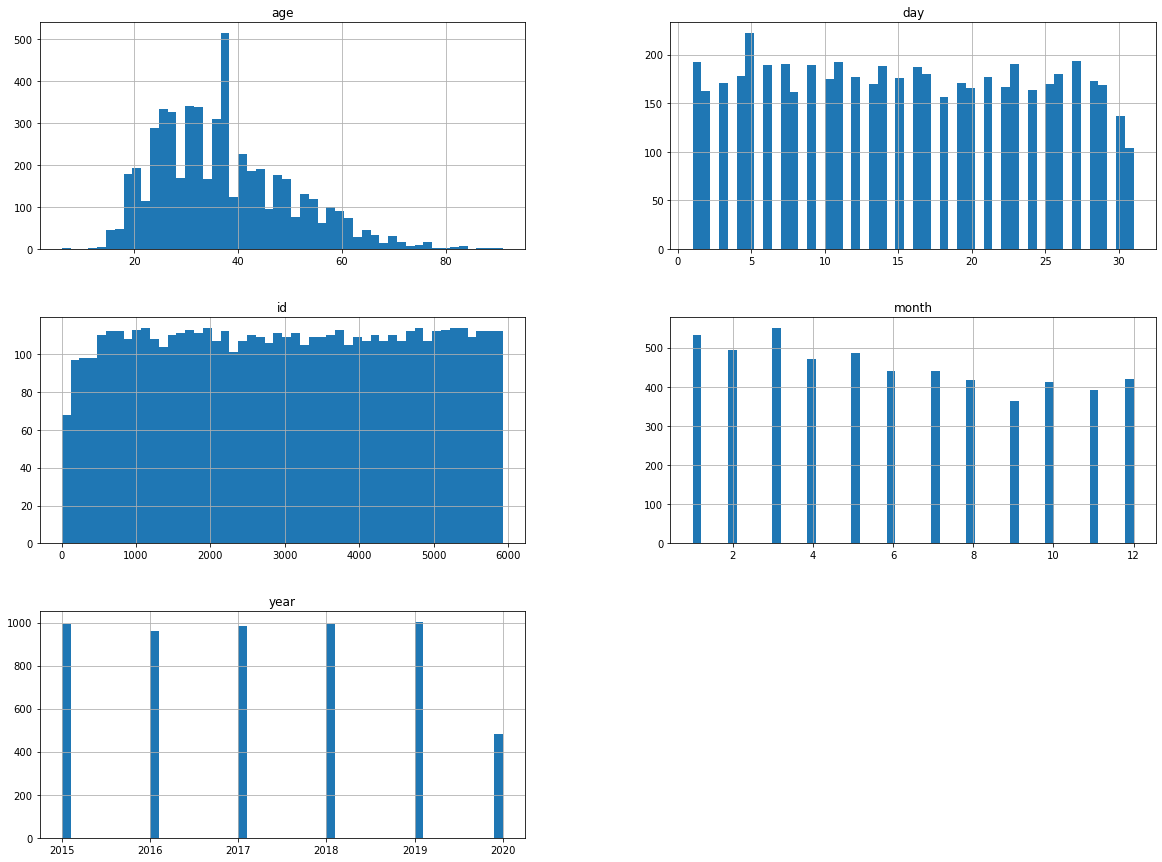

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import copy

processed_data = copy.deepcopy(data)
del processed_data['signs_of_mental_illness']
del processed_data['body_camera']

pd.DataFrame(processed_data)

# ordinal_encoder = OrdinalEncoder()
# onehot_encoder = OneHotEncoder()

# p_race = pd.get_dummies(data['race'])
# p_armed = pd.get_dummies(data['armed'])
# p_flee = pd.get_dummies(data['flee'])
# p_threat_level = pd.get_dummies(data['threat_level'])
# processed_data['race'] = p_race
# processed_data['armed'] = p_armed
# processed_data['flee'] = p_flee
# processed_data['threat_level'] = p_threat_level

# encoded_signs_of_mental_illness = onehot_encoder.fit_transform(data['signs_of_mental_illness'])
# encoded_body_camera = onehot_encoder.fit_transform(dtat['body_camera'])

# processed_data = [data['name'],data['manner_of_death'],data['armed'],\
#                   data['age'],data['gender'],data['race'],data['city'],data['state'],\
#                  encoded_signs_of_mental_illness,data['threat_level'],data['flee'],\
#                  encoded_body_camera,data['year'],data['month'],data['date']]
# processed_data = []

# processed_data.append(data['name'])
# processed_data.append(data['manner_of_death'])
# processed_data.append(data['armed'])
# processed_data.append(data['age'])
# processed_data.append(data['gender'])
# processed_data.append(data['race'])
# processed_data.append(data['city'])
# processed_data.append(data['state'])
# processed_data.append(encoded_signs_of_mental_illness)
# processed_data.append(data['threat_level'])
# processed_data.append(data['flee'])
# processed_data.append(encoded_body_camera)
# processed_data.append(data['year'])
# processed_data.append(data['month'])
# processed_data.append(data['date'])
processed_data.hist(bins=50, figsize=(20, 15))
plt.show()

bool타입이라 signs_of_mental_illness와, body_camera는 hist로 나타내지 못했다. 그래서 인코딩 해서 시각화 하려 했으나, 이것도 해결하지 못했다. 그래서 우선 데이터를 버리고 나머지 데이터들을 시각화 했다. 2020년이 다른 해들에 비해 범죄 수가 적은 이유는, 아직 2020년의 데이터가 모이지 않았기 때문이다. 여기서 다른 데이터들에 비해 특색이 있는 것은, month, age라고 판단 된다.

-> 사이킷 런으로 하면 우선 label로 변환한 후, 진행해야 한다. pandas의 get_dummies()를 사용하면 간편함
https://medium.com/@john_analyst/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%A0%88%EC%9D%B4%EB%B8%94-%EC%9D%B8%EC%BD%94%EB%94%A9%EA%B3%BC-%EC%9B%90%ED%95%AB-%EC%9D%B8%EC%BD%94%EB%94%A9-f0220df21df1

'utf-8' codec can't encode character '\udc67' in position 1: surrogates not allowed
에러가 발생. 커널이 계속 죽어버림...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E693659608>,
      dtype=object)

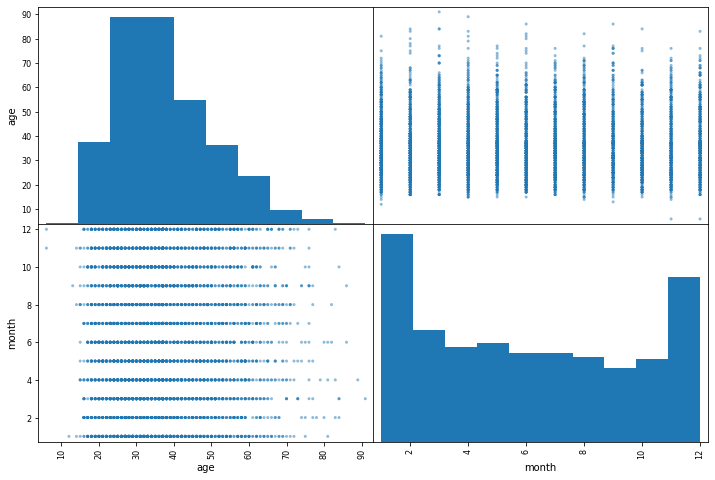

In [32]:
from pandas.plotting import scatter_matrix

attribute = ['manner_of_death', 'age', 'month', 'armed']
scatter_matrix(data[attribute], figsize = (12,8))